In [2]:
from SupportResistance import SupportResistance
from Data import YahooData

import datetime
import time
import pandas as pd
import numpy as np

from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

Gathering the data.

NOTE: The Support and Ressitance algorithm works with __any 1hr or 1d candlestick data__. It can be modified to other time frames within lines 61-74 of the SupportResistance.py file.

In [3]:
plt.style.use('ggplot')

symbols = ['FB']

if __name__ == '__main__':
    start_all = time.perf_counter()
    
    csv = YahooData(symbols, '2008', '2019')
    csv_data = csv.get_data()

Gathering Data...

Gathering the data took: 0.6385 seconds



This takes dataframe out of the dictionary in order to be read and processed by the algorithm. Must be lowercase open, high, low, close columns (forgot to integrate it into the algorithm).

In [4]:
symbol = symbols[0]
sym_data = csv_data[symbol][['open', 'high', 'low', 'close']]

Calling the SupportRessitance class, view the original file for parameter information. Recommended to change candle width to a much lower level such as 0.01 when using 1hr data.

Calculating S/R Took:  0.0398 seconds
Getting all data took: 0.0384 seconds


<IPython.core.display.Javascript object>


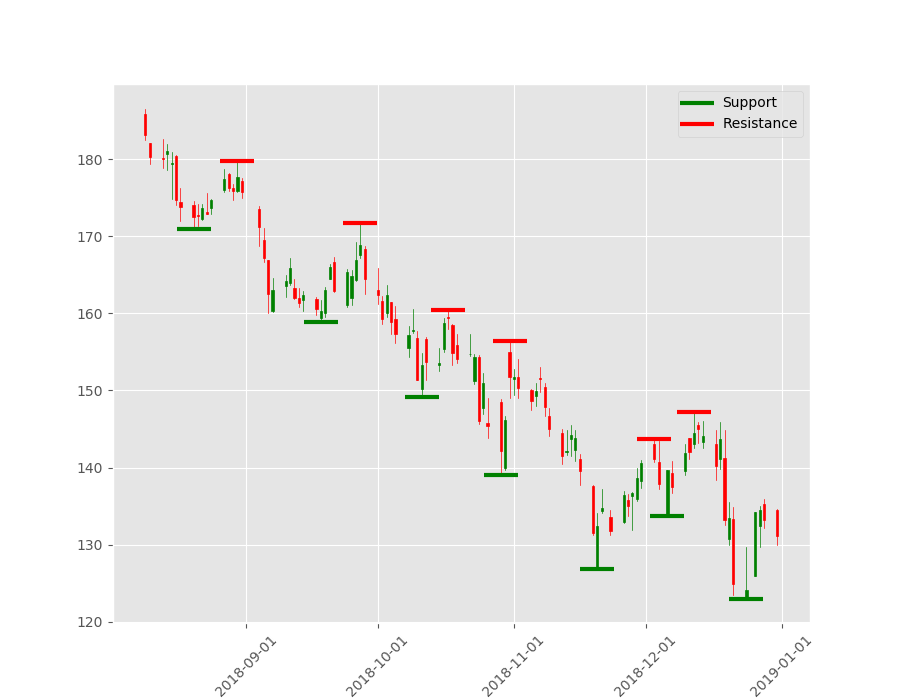

Structuring All Data Took: 0.0189 seconds


In [5]:
SR = SupportResistance(csv_data[symbol], frame = 'Daily', partial_std_amount = 2)
support_resistance = SR.main(view_graph = True, start = -100, end = -1, candle_width = 0.5)
SR_data = SR.get_all_data(support_resistance, sym_data)

Dataframe containing the Support and Resistance data.

In [6]:
SR_data

,open,high,low,close,Kind,PCT
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,NaN,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,NaN,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,NaN,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,NaN,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,NaN,NaN
2012-05-25,32.900002,32.950001,31.110001,31.910000,NaN,NaN
2012-05-29,31.480000,31.690001,28.650000,28.840000,NaN,NaN
2012-05-30,28.700001,29.549999,27.860001,28.190001,NaN,NaN
2012-05-31,28.549999,29.670000,26.830000,29.600000,NaN,NaN


In [7]:
SR_data[SR_data['Kind'] == 'Resistance'].tail()

,open,high,low,close,Kind,PCT
Date,,,,,,
2018-09-27,167.550003,171.770004,167.210007,168.839996,Resistance,0.047070
2018-10-17,159.559998,160.490005,157.949997,159.419998,Resistance,0.048607
2018-10-31,155.000000,156.399994,148.960007,151.789993,Resistance,0.051648
2018-12-03,143.000000,143.679993,140.759995,141.089996,Resistance,0.052801
2018-12-12,143.080002,147.190002,142.509995,144.500000,Resistance,0.053561
